# Loading the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = "amz_uk_price_prediction_dataset.csv"
amazon_df = pd.read_csv(data, encoding='ISO-8859-1')

# Initial Exploration

In [4]:
amazon_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
amazon_df.shape

(2443651, 9)

In [6]:
amazon_df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [7]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


# Exploring numerical and categorical variables

#### 1. Retrivieng the unique data types

In [8]:
list(set(amazon_df.dtypes.tolist()))

[dtype('int64'), dtype('bool'), dtype('float64'), dtype('O')]

#### 2. Extracting column names with numerical data types

In [9]:
amazon_df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

#### 3. Counting and sorting the unique values for each numerical column

In [10]:
amazon_df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

# Part 1:

#### 1.1 Frequency Tables: 

In [11]:
frequency_table = amazon_df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [12]:
print("The top 5 most listed product categories are: ", frequency_table.head(5))

The top 5 most listed product categories are:  category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


#### 1.2 Visualizations: 

/var/folders/lr/d46q9z0s2zndy_5npx2_zwq00000gn/T/ipykernel_10728/3876386879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top5.index, y=top5.values, palette="Set3", legend=True )


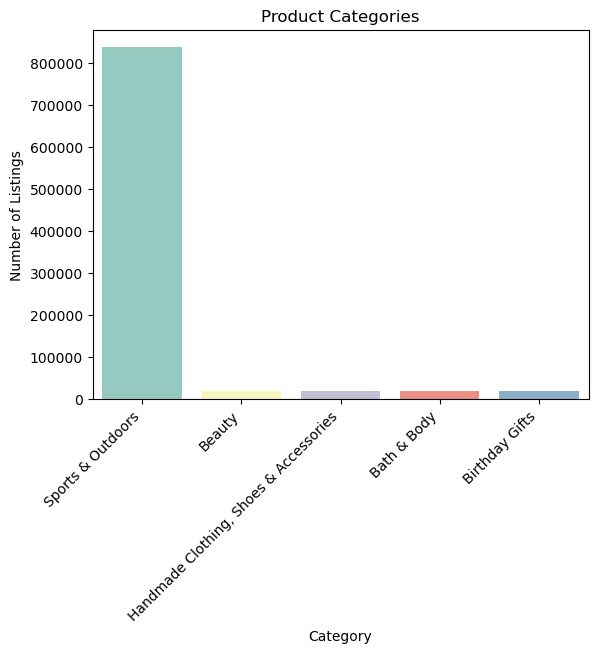

In [13]:
top5 = frequency_table.head(5)

ax = sns.barplot(x=top5.index, y=top5.values, palette="Set3", legend=True )

plt.title("Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha="right")
plt.show()

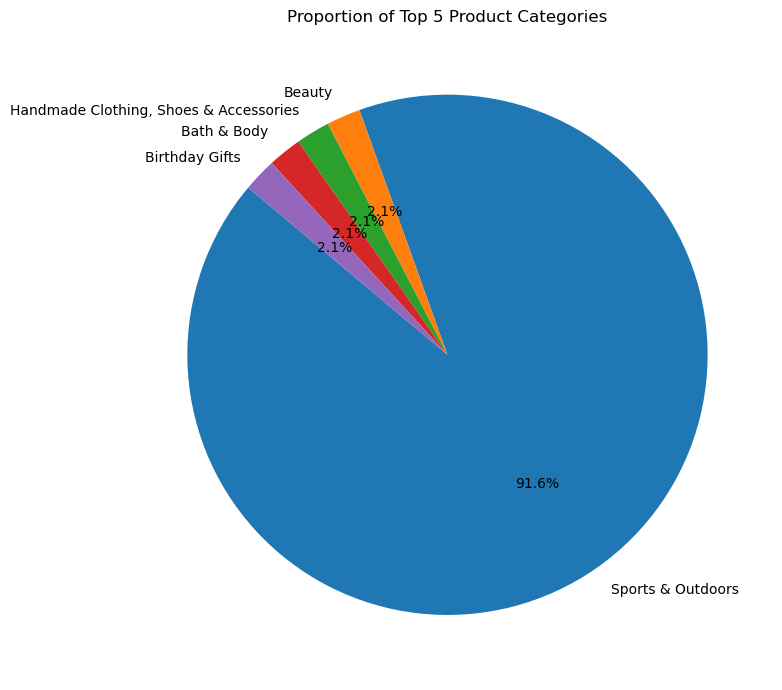

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Proportion of Top 5 Product Categories")
plt.tight_layout()
plt.show()

Conclusion: Sports & Outdoors product category dominates the listing

# Part 2 Delving into Product Pricing

#### 1. Measures of Centrality

In [22]:
mean_price = amazon_df['price'].mean()
median_price = amazon_df['price'].median()
mode_price = amazon_df['price'].mode()[0]

print("Mean: ", mean_price, "\nMedian: ", median_price, "\nMode: ", mode_price)

Mean:  89.24380943923663 
Median:  19.09 
Mode:  9.99


The average price is 89.24€ and the mode is 9.99. This large gap indicates a right-skewed price distribution.

#### 2. Measures of Dispersion

In [25]:
var_price = amazon_df['price'].var()
std_dev_price = amazon_df['price'].std()
range_price = amazon_df['price'].max() - amazon_df['price'].min()
interquartile_range = amazon_df['price'].quantile(0.75) - amazon_df['price'].quantile(0.25)

print("Variance: ", var_price, "\nStandard Deviation: ", std_dev_price, "\nRange: ", range_price, "\nInterquartile: ", interquartile_range)

Variance:  119445.48532256528 
Standard Deviation:  345.60886175352226 
Range:  100000.0 
Interquartile:  36.0


The standard deviation is nearly four times the mean (89.24 €), which strongly suggests extreme dispersion.
And also, a range of 100000€ indicates that prices span from very low-cost items to extremely high-priced products, confirming the existence of outliers.

#### 3. Visualizations:

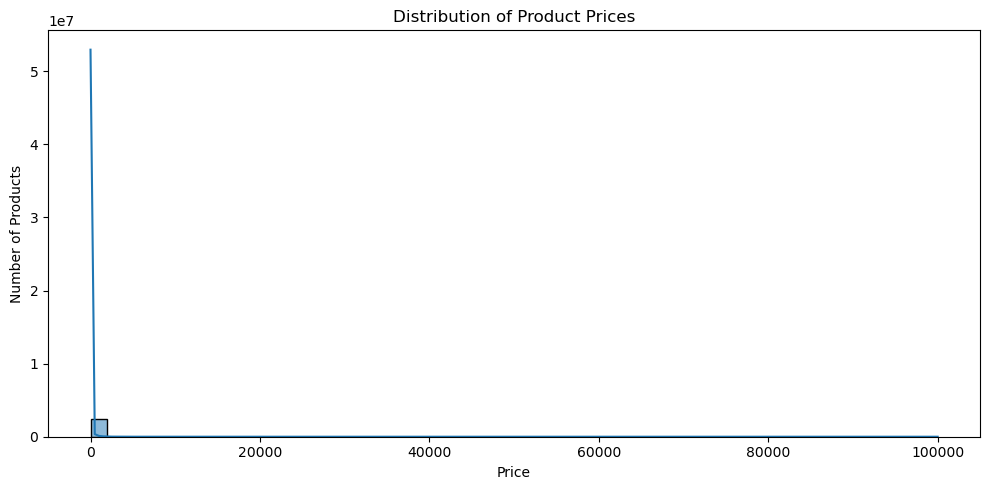

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(amazon_df['price'], bins=50, kde=True)
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Prices")
plt.tight_layout()
plt.show()

Is difficult to interpret because of extreme right skewness in the data, that's why a solution it could be to limit the x-axis to typical prices.

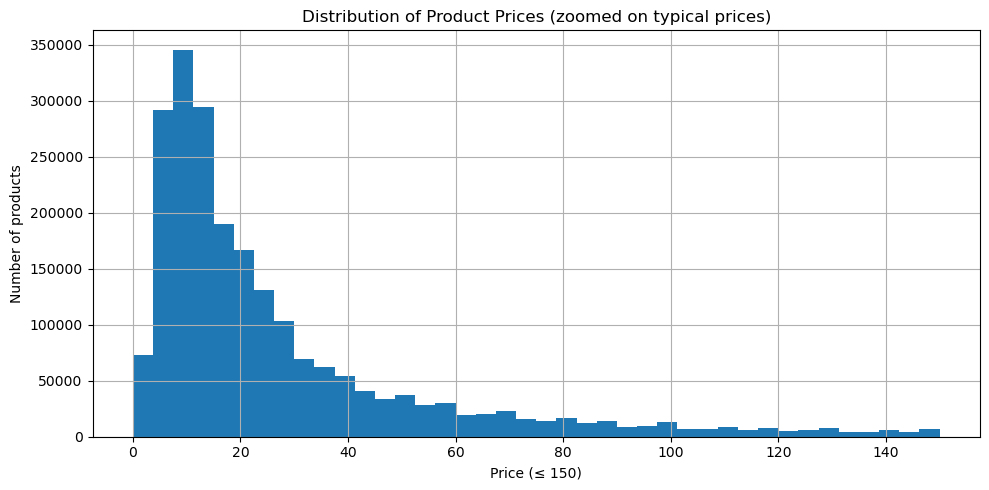

In [36]:
plt.figure(figsize=(10, 5))
amazon_df[amazon_df['price'] <= 150]['price'].hist(bins=40)
plt.xlabel('Price (≤ 150)')
plt.ylabel('Number of products')
plt.title('Distribution of Product Prices (zoomed on typical prices)')
plt.tight_layout()
plt.show()

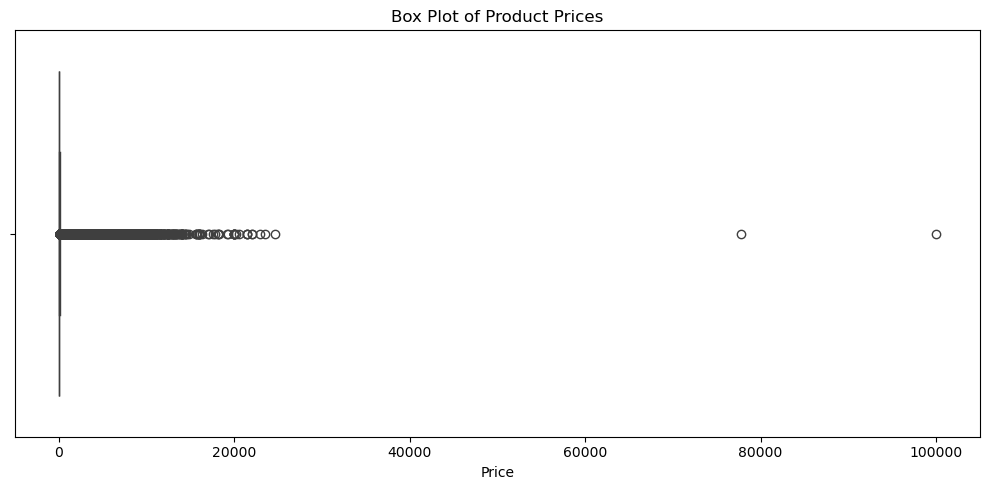

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=amazon_df['price'])
plt.xlabel("Price")
plt.title("Box Plot of Product Prices")
plt.tight_layout()
plt.show()

# Part 3 Unpacking product ratings

#### 1. Measures of centrality

In [40]:
mean_rating = amazon_df['stars'].mean()
median_rating = amazon_df['stars'].median()
mode_rating = amazon_df['stars'].mode()[0]

print("Mean: ", mean_rating, "\nMedian: ", median_rating, "\nMode: ", mode_rating)

Mean:  2.152836472966065 
Median:  0.0 
Mode:  0.0


Customer normally don't tend to rate. But if we take the 0 ratings:

In [42]:
stars = amazon_df[amazon_df['stars'] > 0]['stars']

mean_stars = stars.mean()
median_stars = stars.median()
mode_stars = stars.mode()[0]

print("Mean: ", mean_stars, "\nMedian: ", median_stars, "\nMode: ", mode_stars)

Mean:  4.31916076222691 
Median:  4.4 
Mode:  4.5


The customer normally tend to rate with 4.5 stars

#### 2. Measures of Distribution

In [43]:
var_rate = amazon_df['stars'].var()
std_dev_rate = amazon_df['stars'].std()
range_rate = amazon_df['stars'].max() - amazon_df['stars'].min()
interquartile_range_rate = amazon_df['stars'].quantile(0.75) - amazon_df['stars'].quantile(0.25)

print("Variance: ", var_rate, "\nStandard Deviation: ", std_dev_rate, "\nRange: ", range_rate, "\nInterquartile: ", interquartile_range_rate)

Variance:  4.81743402976196 
Standard Deviation:  2.1948653785054697 
Range:  5.0 
Interquartile:  4.4


The ratings are consistent.

#### 3. Shape of the Distribution

In [45]:
skewness_rate = amazon_df['stars'].skew()
kurtosis_rate = amazon_df['stars'].kurtosis()

skewness_rate, kurtosis_rate

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

The ratings are approximately symmetric but not normally distributed.

#### 4. Visualization

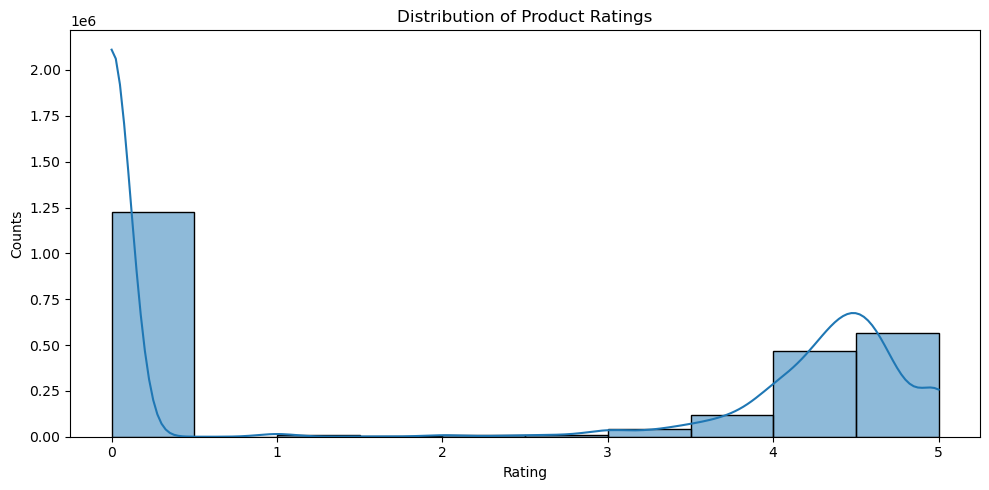

In [48]:
plt.figure(figsize=(10, 5))
sns.histplot(amazon_df['stars'], bins=10, kde=True)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Distribution of Product Ratings")
plt.tight_layout()
plt.show()